In [17]:
import pandas as pd
df = pd.read_csv("laptop_data.csv")
print(df)

     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

# Предобработка данных


## Проверка на дубликаты:

In [18]:
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  1


In [19]:
df = df.drop_duplicates()
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  0


## Проверка на None или NaN значения:

In [20]:
print(df.isnull().sum())

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


## String to int

In [21]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ["Company", "TypeName", "Ram", "Cpu_brand", "Gpu_brand", "Os"]:
    df[i] = label.fit_transform(df[i])
display(df)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,1,4,3,1.37,11.175755,0,1,226.983005,2,0,128,1,0
1,1,4,3,1.34,10.776777,0,0,127.677940,2,0,0,1,0
2,7,3,3,1.86,10.329931,0,0,141.211998,2,0,256,1,1
3,1,4,5,1.83,11.814476,0,1,220.534624,3,0,512,0,0
4,1,4,3,1.37,11.473101,0,1,226.983005,2,0,256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,2,3,1,2.20,10.555257,0,0,100.454670,3,500,0,2,2
1269,10,0,1,1.80,10.433899,1,1,157.350512,3,0,128,1,2
1270,10,0,5,1.30,11.288115,1,1,276.053530,3,0,512,1,2
1271,10,3,0,1.50,9.409283,0,0,111.935204,4,0,0,1,2


## Разделение признаков

In [22]:
categorical = ["Company", "TypeName", "Ram", "TouchScreen", "Ips", "Cpu_brand", "HDD", "SSD", "Gpu_brand", "Os"]
cont = []
for i in df.columns:
    if i not in categorical:
        cont.append(i)
cont

['Weight', 'Price', 'Ppi']

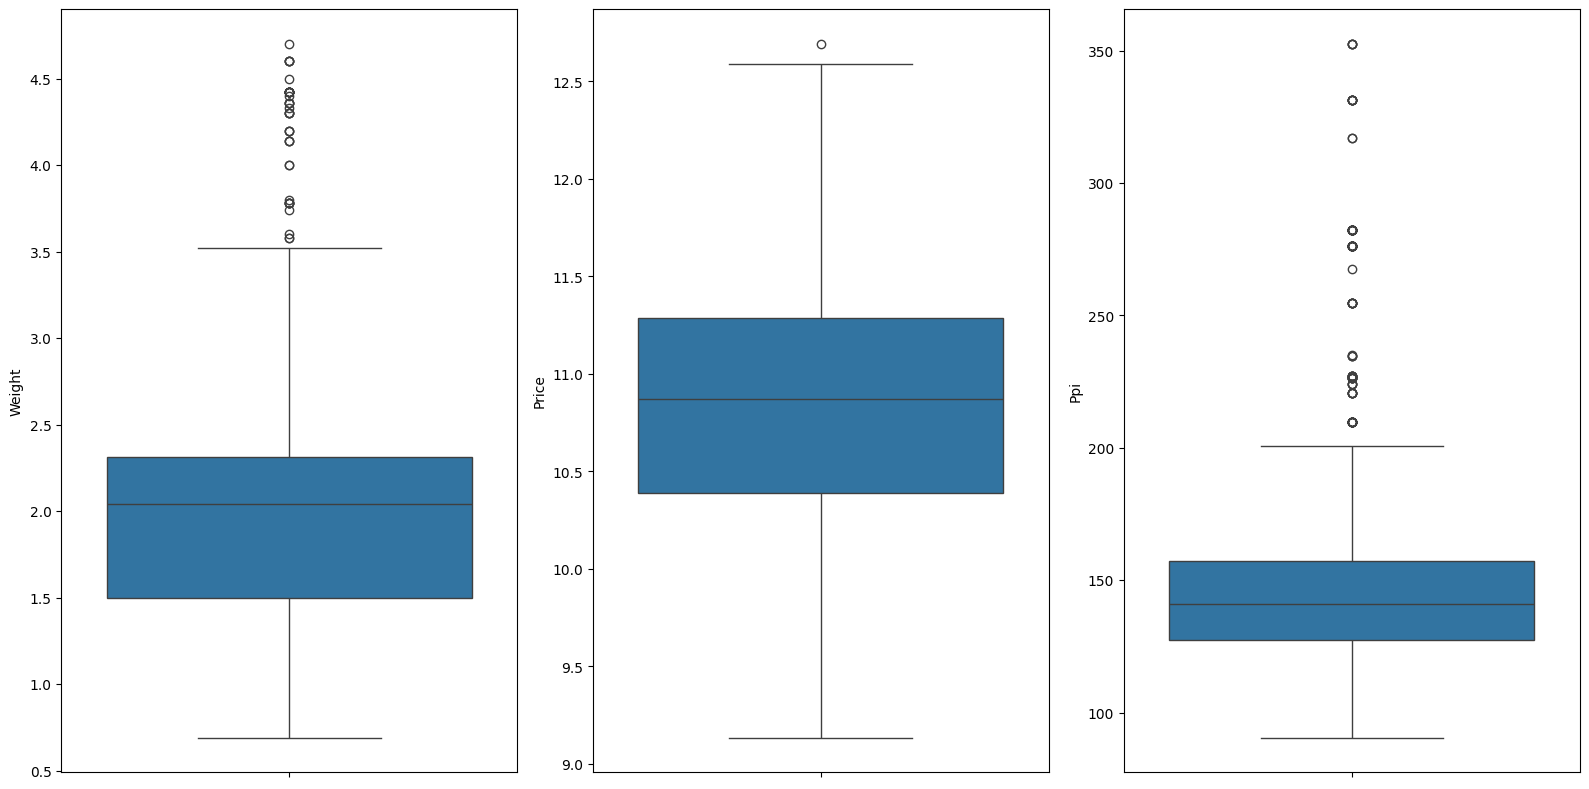

In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

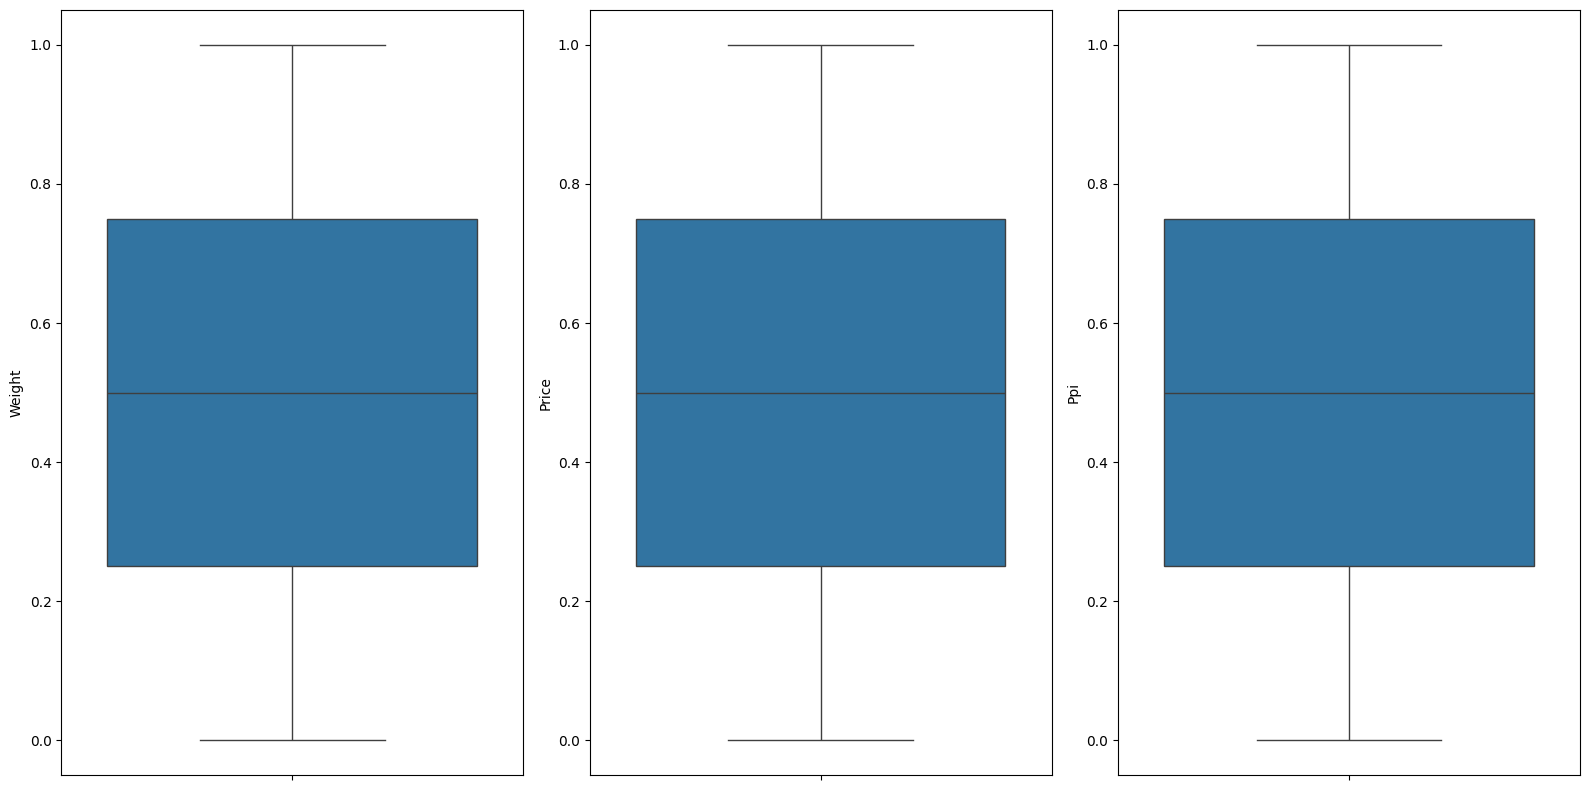

In [24]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=5, random_state=1)
df[cont] = qt.fit_transform(df[cont])

fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

## Матрица корреляций

<Axes: >

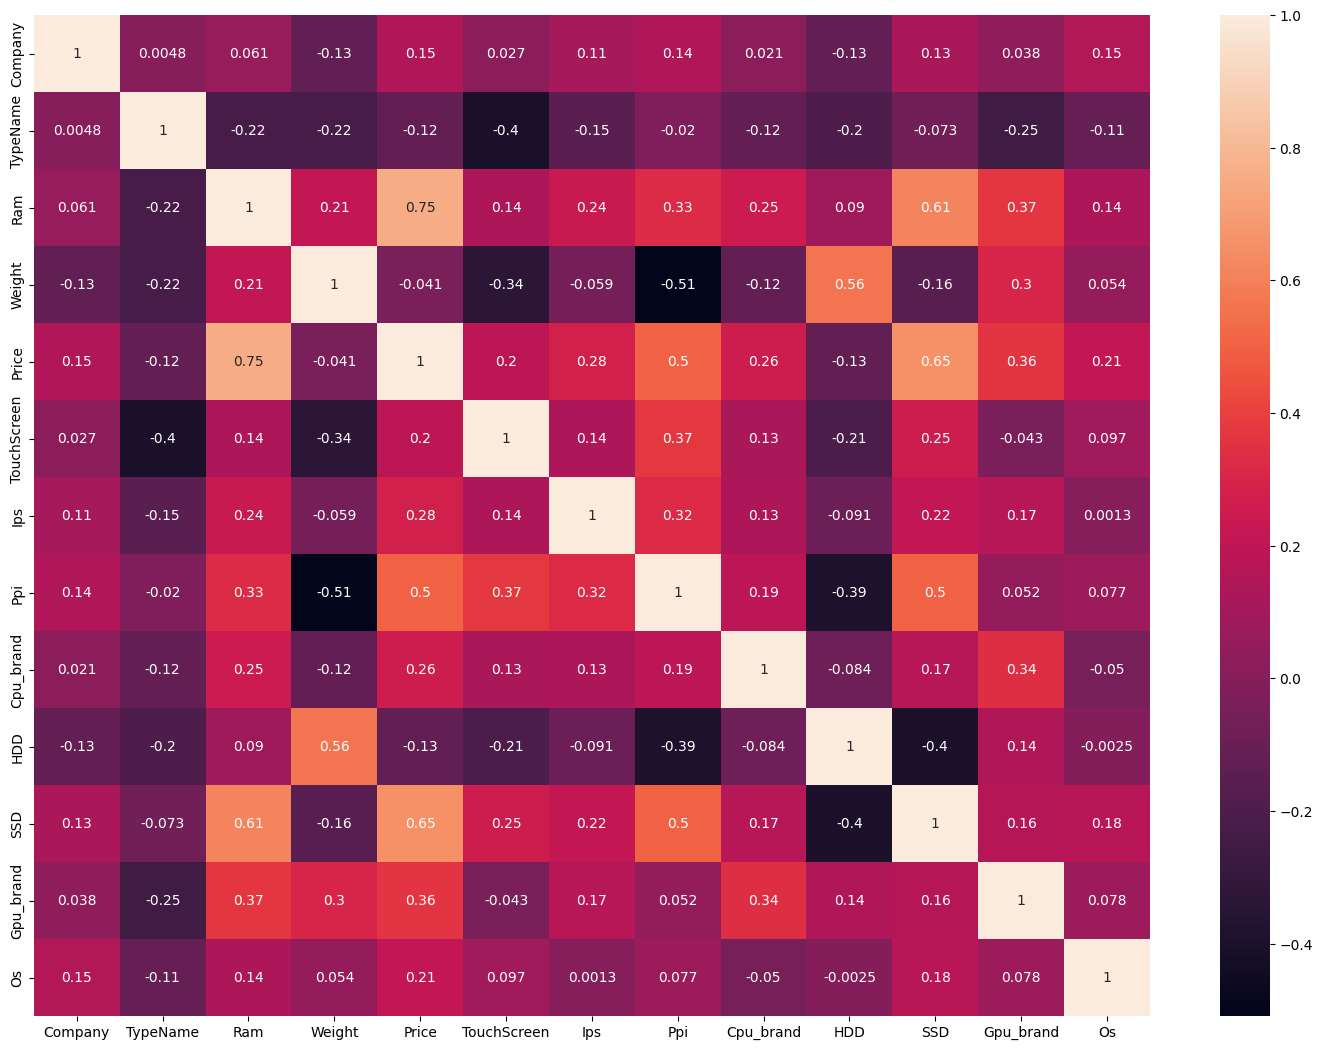

In [25]:
plt.figure(figsize = (18,13))
sns.heatmap(df.corr(), annot=True)

## Тренировочная и тестовая выборки

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(1017, 12)
(255, 12)


# Обучение моделей

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def performance(y_test, y_pred):
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2:', r2_score(y_test, y_pred))

## Линейная регрессия

Градиентным спуском минимизируется среднеквадратическое отклонение предсказанного значения ($w * x_i + b$) от настоящего ($y_i$):

$$MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - (w * x_i + b))$$

In [28]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)
performance(y_test, y_pred)

MAE: 0.11061042379849051
MSE: 0.018040002886528708
RMSE: 0.13431307786857058
R^2: 0.6935350966500968


Посмотрим на среднее значение целевого признака:

df['Price'].mean()

In [30]:
linear.intercept_

-0.0708154624486162

In [31]:
coefs_linear = linear.coef_
print(coefs_linear)

print(np.min(np.abs(coefs_linear)), np.max(np.abs(coefs_linear)))

[ 1.94358796e-03  1.08342822e-02  8.84275126e-02 -7.25753643e-02
 -3.80469860e-04  1.59287127e-02  1.68356023e-01  9.43444546e-04
  5.23716170e-06  2.37865757e-04  6.02495017e-02  6.21761050e-02]
5.237161700179784e-06 0.16835602310280295


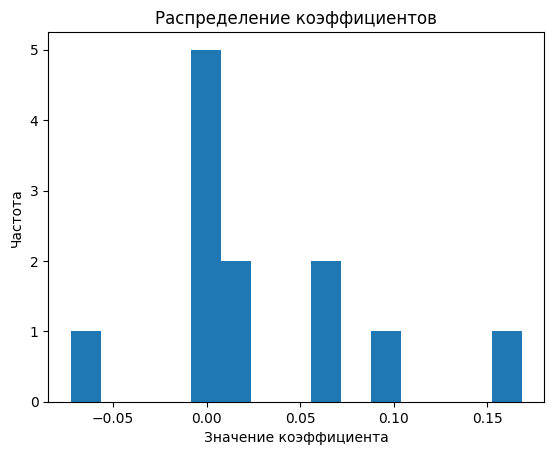

In [33]:
plt.hist(coefs_linear, bins=15)
plt.title("Распределение коэффициентов")
plt.xlabel("Значение коэффициента")
plt.ylabel("Частота")
plt.show()

## LASSO

В LASSO регрессии добавляется L1-регуляризация:

$$err = \frac{1}{n}\sum_{i=1}^n(y_i - (w * x_i + b)) + \alpha \sum_{i=1}^{d}|w_i|$$

где d -- число признаков

Сделаем коэффициент регуляризации сначала малым.

In [38]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, random_state=1)
lasso.fit(X_train, y_train)
print(lasso.coef_)
y_pred = lasso.predict(X_test)
performance(y_test, y_pred)

[ 1.97333119e-03  1.07782119e-02  8.83189332e-02 -6.98218160e-02
  0.00000000e+00  1.55671665e-02  1.67578855e-01  1.01160398e-03
  4.69981601e-06  2.39292450e-04  5.98225956e-02  6.14102899e-02]
MAE: 0.11056073903264135
MSE: 0.01801625126291781
RMSE: 0.13422462986694286
R^2: 0.6939385909887674


Увеличим коэффициент регуляризации.

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001, random_state=1)
lasso.fit(X_train, y_train)
print(lasso.coef_)
y_pred = lasso.predict(X_test)
performance(y_test, y_pred)

[ 2.22926899e-03  9.78918746e-03  8.74380774e-02 -4.66765566e-02
  0.00000000e+00  1.22745106e-02  1.61265268e-01  1.63655183e-03
 -2.83852094e-07  2.52032358e-04  5.57555183e-02  5.46501054e-02]
MAE: 0.11017145923723107
MSE: 0.017854150927482333
RMSE: 0.13361942571154214
R^2: 0.6966923634767597


Один коэффициент занулился, найдем в интервале [0.0001, 0.001] коэффициент при котором MSE будет минимальным.

In [63]:
n_alphas = 1000
alphas = np.linspace(0.0001, 0.12, n_alphas)

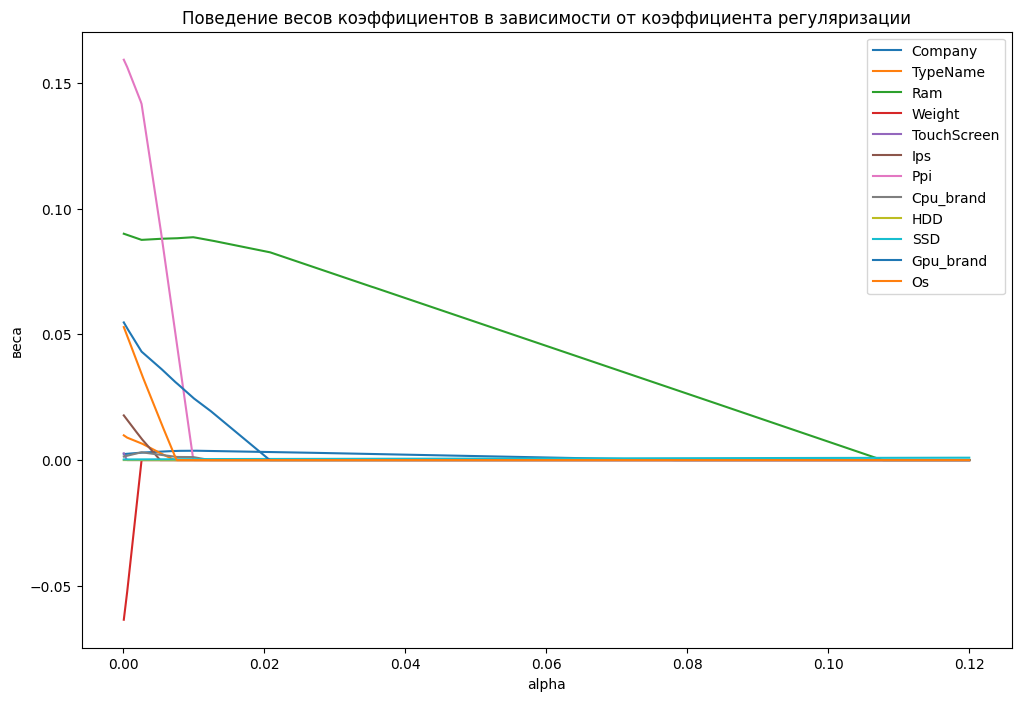

In [65]:
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.figure(figsize = (12,8))
ax = plt.gca()

ax.plot(alphas, coefs)
plt.xlabel("alpha")
plt.ylabel("веса")
plt.title("Поведение весов коэффициентов в зависимости от коэффициента регуляризации")
plt.legend(X.columns, loc='upper right')
plt.axis("tight")
plt.show();

In [66]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=1)
lasso_cv.fit(X_train, y_train);
lasso_cv.alpha_

0.00046006006006006004

In [67]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

performance(y_test, y_pred)

MAE: 0.11039689950393225
MSE: 0.017942006342573813
RMSE: 0.133947774683172
R^2: 0.695199869187034


In [68]:
print(lasso.intercept_)
print(lasso.coef_)
print(np.min(np.abs(lasso.coef_)))
print(np.max(np.abs(lasso.coef_)))
print((lasso.coef_ == 0).sum())

-0.06545586627175254
[ 2.07579572e-03  1.03824225e-02  8.79656518e-02 -6.05518475e-02
  0.00000000e+00  1.42492258e-02  1.65053704e-01  1.26203238e-03
  2.70119141e-06  2.44389773e-04  5.81953816e-02  5.87056588e-02]
0.0
0.16505370404130168
1


In [69]:
X.columns[np.where(lasso.coef_ == 0)[0]]

Index(['TouchScreen'], dtype='object')

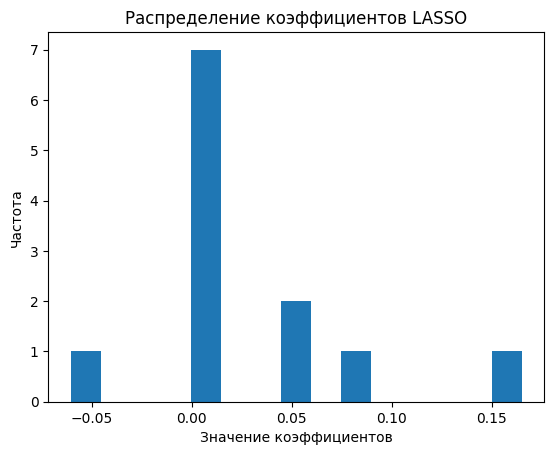

In [72]:
plt.hist(lasso.coef_, bins=15)
plt.title("Распределение коэффициентов LASSO")
plt.xlabel("Значение коэффициентов")
plt.ylabel("Частота")
plt.show()